In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

base_url = "https://api.nhtsa.gov/SafetyRatings"
year = 2022

car_brands = ['Ford', 'Toyota', 'Tesla', 'Chevrolet', 'Honda', 'Nissan', 'Jeep', 'Hyundai', 'Subaru', 'GMC', 'Ram', 'Volkswagen', 'BMW', 'Mercedes-Benz', 'Dodge', 'Lexus', 'Audi', 'Mazda', 'Kia', 'Buick', 'Cadillac']

# Dictionary to store models and their safety ratings for each brand


In [2]:
data = {}

for make in car_brands:
    # Fetch all models for the current make and year
    models_url = f"{base_url}/modelyear/{year}/make/{make}"
    response = requests.get(models_url)
    models_data = response.json()
    
    # Extract the list of models for the current make
    models = [model['Model'] for model in models_data['Results']]
    
    for model in models:
        # Fetch safety ratings for the current model
        safety_ratings_url = f"{base_url}/modelyear/{year}/make/{make}/model/{model}"
        response = requests.get(safety_ratings_url)
        safety_data = response.json()
        
        # Store the safety ratings for the current model
        data[f"{make} {model}"] = safety_data['Results']


In [3]:
# Flatten the nested dictionary structure
flattened_data = []
for make_model, attributes in data.items():
    for item in attributes:
        item['Make_Model'] = make_model
        flattened_data.append(item)

# Convert the flattened data to a DataFrame
df = pd.DataFrame(flattened_data)


In [4]:
print(df.columns)

Index(['VehicleDescription', 'VehicleId', 'Make_Model'], dtype='object')


In [5]:
# Set the display option to show all rows
pd.set_option('display.max_rows', None)

# Print the entire 'VehicleDescription' column
print(df['Make_Model'])

# Reset the display option to default (optional)
pd.reset_option('display.max_rows')

0                                          Ford BRONCO
1                                          Ford BRONCO
2                                    Ford BRONCO SPORT
3                                        Ford ECOSPORT
4                                        Ford ECOSPORT
5                                            Ford EDGE
6                                            Ford EDGE
7                                          Ford ESCAPE
8                                          Ford ESCAPE
9                                      Ford ESCAPE HEV
10                                     Ford ESCAPE HEV
11                                    Ford ESCAPE PHEV
12                                     Ford EXPEDITION
13                                     Ford EXPEDITION
14                                  Ford EXPEDITION EL
15                                  Ford EXPEDITION EL
16                                       Ford EXPLORER
17                                       Ford EXPLORER
18        

In [6]:
# Set the display option to show all rows
pd.set_option('display.max_rows', None)

# Print the entire 'VehicleDescription' column
print(df['VehicleDescription'])

# Reset the display option to default (optional)
pd.reset_option('display.max_rows')


0                           2022 Ford Bronco 2DR SUV 4WD
1                           2022 Ford Bronco 4DR SUV 4WD
2                         2022 Ford Bronco Sport SUV 4WD
3                             2022 Ford EcoSport SUV AWD
4                             2022 Ford EcoSport SUV FWD
5                                 2022 Ford Edge SUV AWD
6                                 2022 Ford Edge SUV FWD
7                               2022 Ford Escape SUV AWD
8                               2022 Ford Escape SUV FWD
9                           2022 Ford Escape HEV SUV AWD
10                          2022 Ford Escape HEV SUV FWD
11                         2022 Ford Escape PHEV SUV FWD
12                          2022 Ford Expedition SUV 4WD
13                          2022 Ford Expedition SUV 2WD
14                       2022 Ford Expedition EL SUV 4WD
15                       2022 Ford Expedition EL SUV 2WD
16                            2022 Ford Explorer SUV 4WD
17                            2

In [7]:
# Set the display option to show all rows
pd.set_option('display.max_rows', None)

# Print the entire 'VehicleDescription' column
print(df['VehicleId'])

# Reset the display option to default (optional)
pd.reset_option('display.max_rows')

0      17037
1      16331
2      16332
3      16376
4      16333
5      16377
6      16334
7      16378
8      16335
9      16379
10     16336
11     16337
12     16380
13     16338
14     16381
15     16339
16     16382
17     16340
18     16383
19     16341
20     16384
21     16342
22     16385
23     16343
24     16348
25     16386
26     16344
27     16387
28     16345
29     16388
30     16346
31     16389
32     16347
33     16392
34     16351
35     16390
36     16349
37     16391
38     16350
39     16352
40     16395
41     16355
42     16393
43     16353
44     16394
45     16354
46     16356
47     16396
48     16357
49     16358
50     16361
51     16359
52     16360
53     16398
54     16362
55     16399
56     16363
57     16400
58     16364
59     16365
60     16366
61     16520
62     16491
63     16493
64     16492
65     16495
66     16494
67     16497
68     16496
69     16490
70     16489
71     16499
72     16498
73     16401
74     16367
75     16368
76     16664

In [8]:
alt_url = "https://api.nhtsa.gov/SafetyRatings/VehicleId"

# List to store overall ratings
overall_ratings = []

# Iterate through the 'VehicleId' column
for vehicle_id in df['VehicleId']:
    # Make the API call
    response = requests.get(f"{alt_url}/{vehicle_id}")
    data = response.json()
    
    # Extract the overall rating and append to the list
    overall_rating = data['Results'][0]['OverallRating']
    overall_ratings.append(overall_rating)



In [9]:
# Step 1: Extract the Body Type
# Define a regular expression pattern for common body types
pattern = r"(.+\W|(\w+)?)(?=\s+(AWD|FWD|RWD))"

# Extract the body type and create a new column 'BodyType'
df['BodyType'] = df['VehicleDescription'].str.extract(pattern, expand=True)[0]

# Handle rows where no body type was extracted (you can adjust this as needed)
df['BodyType'].fillna('Other', inplace=True)



In [10]:
df['BodyType']

0      Other
1      Other
2      Other
3        SUV
4        SUV
       ...  
649      SUV
650      SUV
651      SUV
652      SUV
653      SUV
Name: BodyType, Length: 654, dtype: object

In [11]:
# Add the overall ratings to the DataFrame
df['OverallRating'] = overall_ratings

# Now, you have a new column 'OverallRating' in your DataFrame
print(df[['Make_Model','VehicleId', 'OverallRating']])





            Make_Model  VehicleId OverallRating
0          Ford BRONCO      17037     Not Rated
1          Ford BRONCO      16331     Not Rated
2    Ford BRONCO SPORT      16332             5
3        Ford ECOSPORT      16376             4
4        Ford ECOSPORT      16333             4
..                 ...        ...           ...
649       Cadillac XT4      16077             5
650       Cadillac XT5      16086             5
651       Cadillac XT5      16076             5
652       Cadillac XT6      16088             5
653       Cadillac XT6      16078             5

[654 rows x 3 columns]


In [12]:
import numpy as np

# Replace "Not Rated" with np.nan
df['OverallRating'] = df['OverallRating'].replace('Not Rated', np.nan)

# Convert the 'OverallRating' column to numeric
df['OverallRating'] = pd.to_numeric(df['OverallRating'], errors='coerce')


In [13]:
# Select the desired columns
selected_df = df[['Make_Model', 'BodyType', 'OverallRating']]
print(selected_df)


            Make_Model BodyType  OverallRating
0          Ford BRONCO    Other            NaN
1          Ford BRONCO    Other            NaN
2    Ford BRONCO SPORT    Other            5.0
3        Ford ECOSPORT      SUV            4.0
4        Ford ECOSPORT      SUV            4.0
..                 ...      ...            ...
649       Cadillac XT4      SUV            5.0
650       Cadillac XT5      SUV            5.0
651       Cadillac XT5      SUV            5.0
652       Cadillac XT6      SUV            5.0
653       Cadillac XT6      SUV            5.0

[654 rows x 3 columns]


c:\Users\aquil\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


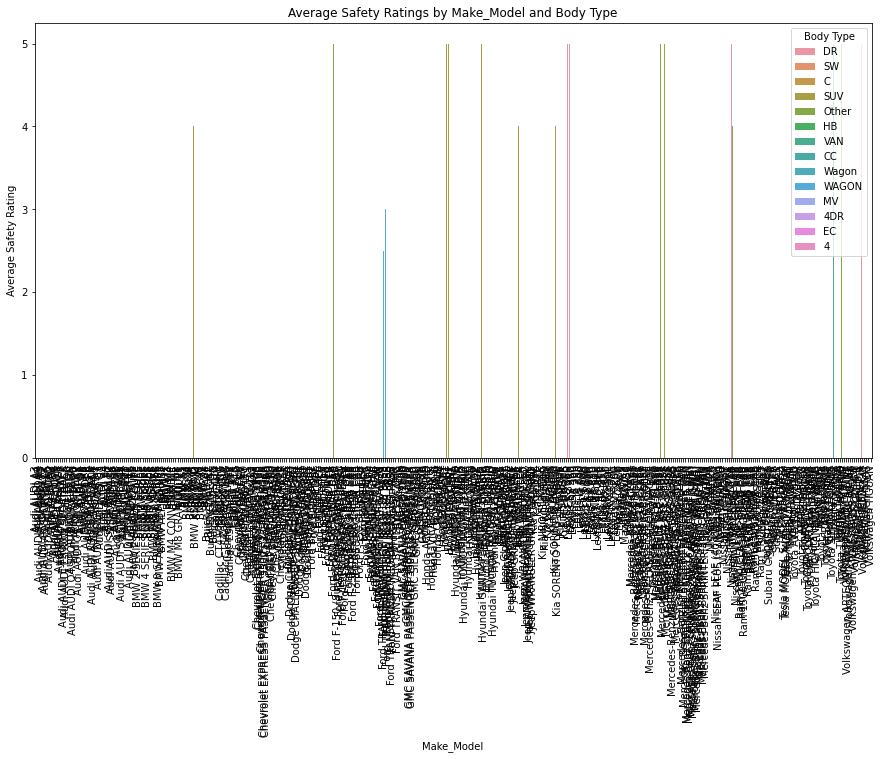

In [14]:
import seaborn as sns

# Group by 'Make_Model' and 'BodyType' and calculate the average safety rating
# Note: Adjust the aggregation method if 'OverallRating' is not numeric
avg_ratings = df.groupby(['Make_Model', 'BodyType'])['OverallRating'].mean().reset_index()

# Plot the data using seaborn's barplot
plt.figure(figsize=(15, 8))
sns.barplot(x='Make_Model', y='OverallRating', hue='BodyType', data=avg_ratings)
plt.title('Average Safety Ratings by Make_Model and Body Type')
plt.xlabel('Make_Model')
plt.ylabel('Average Safety Rating')
plt.xticks(rotation=90)
plt.legend(title='Body Type')
plt.show()


C:\Users\aquil\AppData\Local\Temp/ipykernel_18180/2035858838.py:15: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


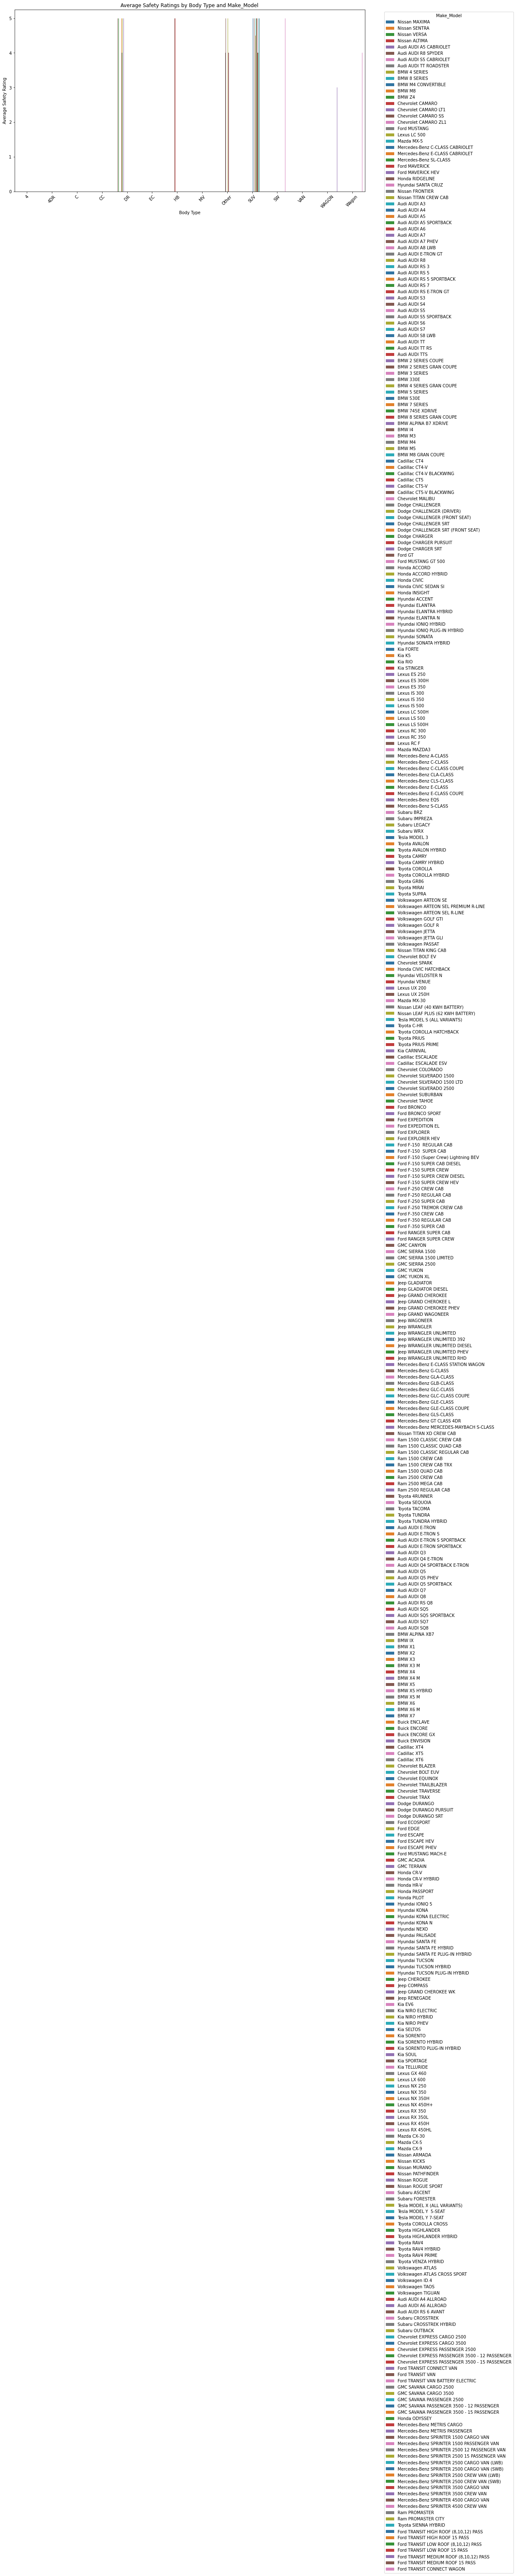

In [81]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group by 'BodyType' and 'Make_Model' and calculate the average safety rating
avg_ratings = df.groupby(['BodyType', 'Make_Model'])['OverallRating'].mean().reset_index()

# Plot the data using seaborn's barplot
plt.figure(figsize=(15, 8))
sns.barplot(x='BodyType', y='OverallRating', hue='Make_Model', data=avg_ratings, palette="tab10")
plt.title('Average Safety Ratings by Body Type and Make_Model')
plt.xlabel('Body Type')
plt.ylabel('Average Safety Rating')
plt.xticks(rotation=45)
plt.legend(title='Make_Model', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


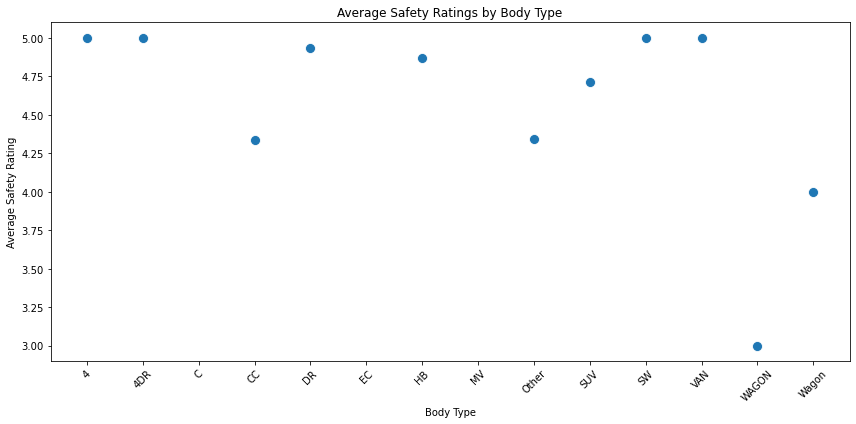

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group by 'BodyType' and calculate the average safety rating
avg_ratings = df.groupby('BodyType')['OverallRating'].mean().reset_index()

# Plot the data using seaborn's scatterplot
plt.figure(figsize=(12, 6))
sns.scatterplot(x='BodyType', y='OverallRating', data=avg_ratings, s=100)
plt.title('Average Safety Ratings by Body Type')
plt.xlabel('Body Type')
plt.ylabel('Average Safety Rating')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\aquil\AppData\Local\Temp/ipykernel_18180/870516512.py:15: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


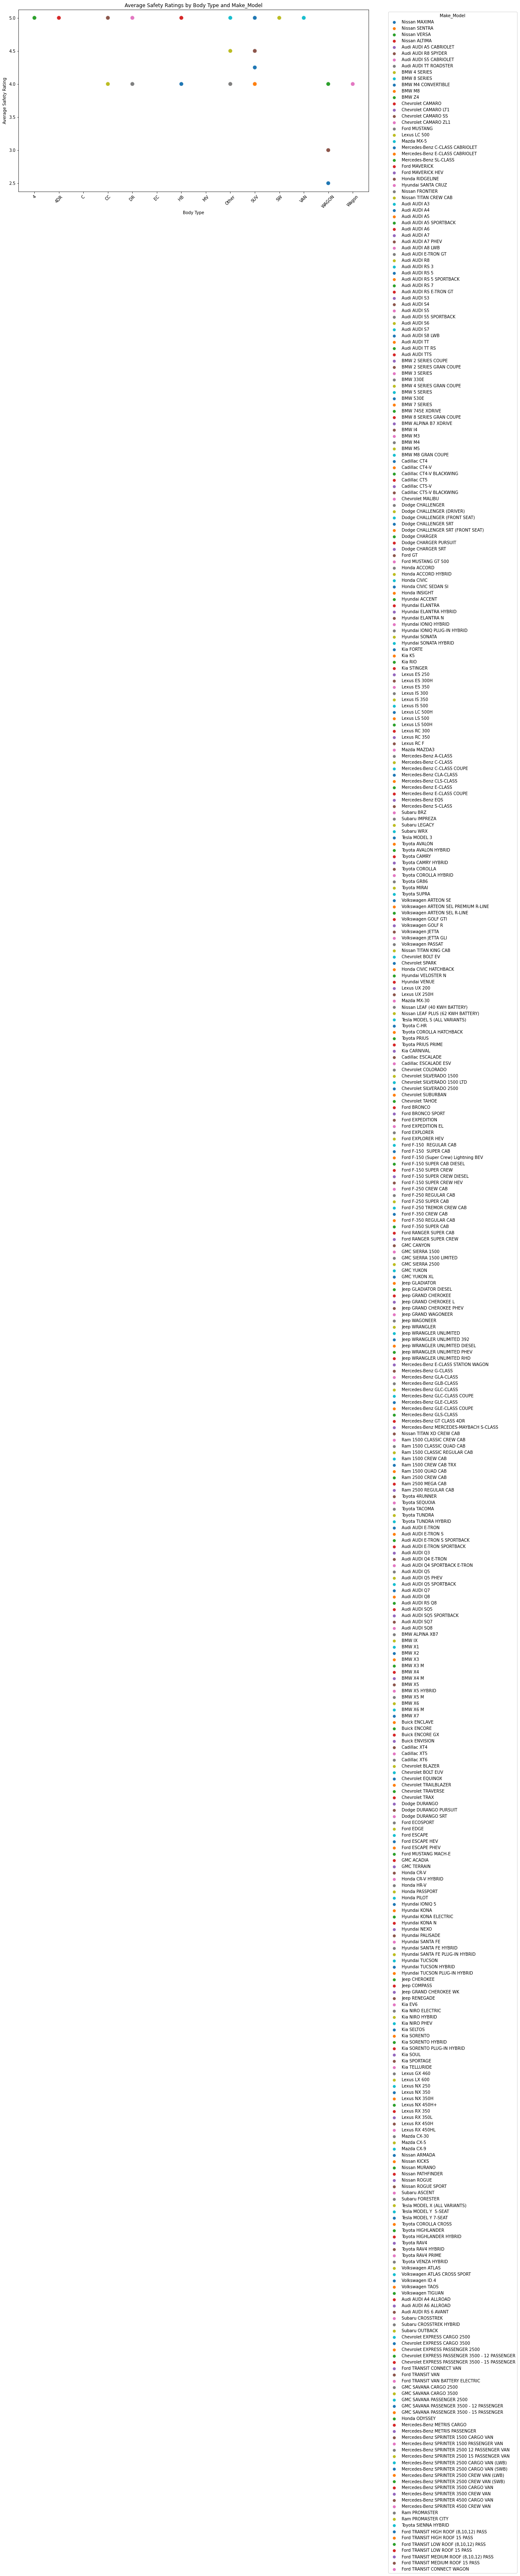

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group by 'BodyType' and 'Make_Model' and calculate the average safety rating
avg_ratings = df.groupby(['BodyType', 'Make_Model'])['OverallRating'].mean().reset_index()

# Plot the data using seaborn's scatterplot
plt.figure(figsize=(15, 8))
sns.scatterplot(x='BodyType', y='OverallRating', hue='Make_Model', data=avg_ratings, palette="tab10", s=100)
plt.title('Average Safety Ratings by Body Type and Make_Model')
plt.xlabel('Body Type')
plt.ylabel('Average Safety Rating')
plt.xticks(rotation=45)
plt.legend(title='Make_Model', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


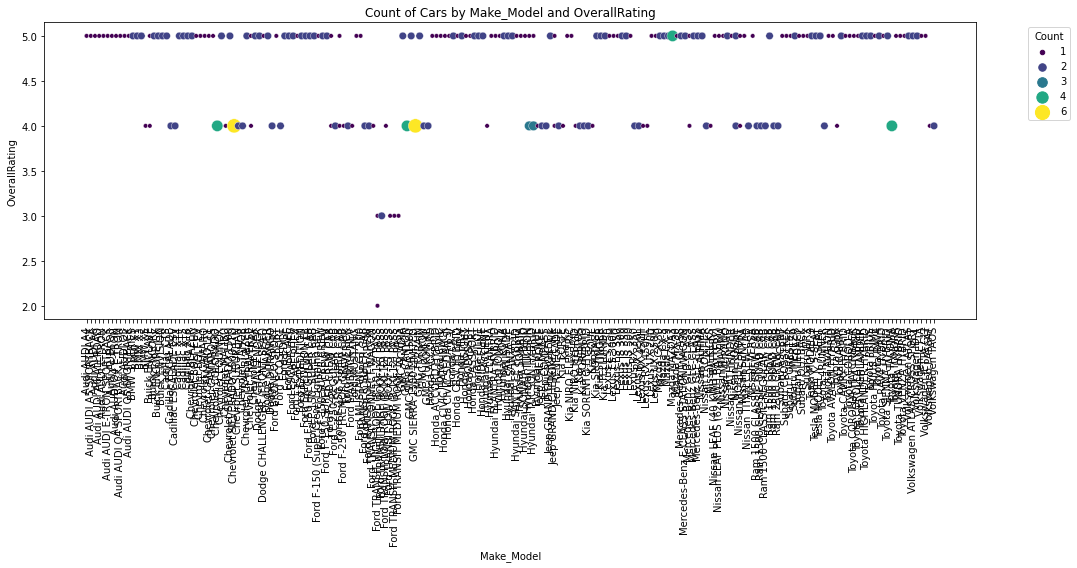

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group by 'Make_Model' and 'OverallRating' to get counts
grouped = df.groupby(['Make_Model', 'OverallRating']).size().reset_index(name='Count')

# Plot the data using seaborn's scatterplot with point size based on 'Count'
plt.figure(figsize=(15, 8))
sns.scatterplot(x='Make_Model', y='OverallRating', size='Count', sizes=(20, 200), data=grouped, hue='Count', palette="viridis")
plt.title('Count of Cars by Make_Model and OverallRating')
plt.xlabel('Make_Model')
plt.ylabel('OverallRating')
plt.xticks(rotation=90)
plt.legend(title='Count', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


    BodyType            Make_Model  Count
0          4         Nissan MAXIMA      1
1          4         Nissan SENTRA      1
2          4          Nissan VERSA      1
3        4DR         Nissan ALTIMA      2
6         CC       Honda RIDGELINE      2
..       ...                   ...    ...
210       SW      Subaru CROSSTREK      1
211       SW        Subaru IMPREZA      1
212       SW        Subaru OUTBACK      1
213      VAN         Honda ODYSSEY      1
214      VAN  Toyota SIENNA HYBRID      2

[153 rows x 3 columns]


C:\Users\aquil\AppData\Local\Temp/ipykernel_11904/2732868368.py:18: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


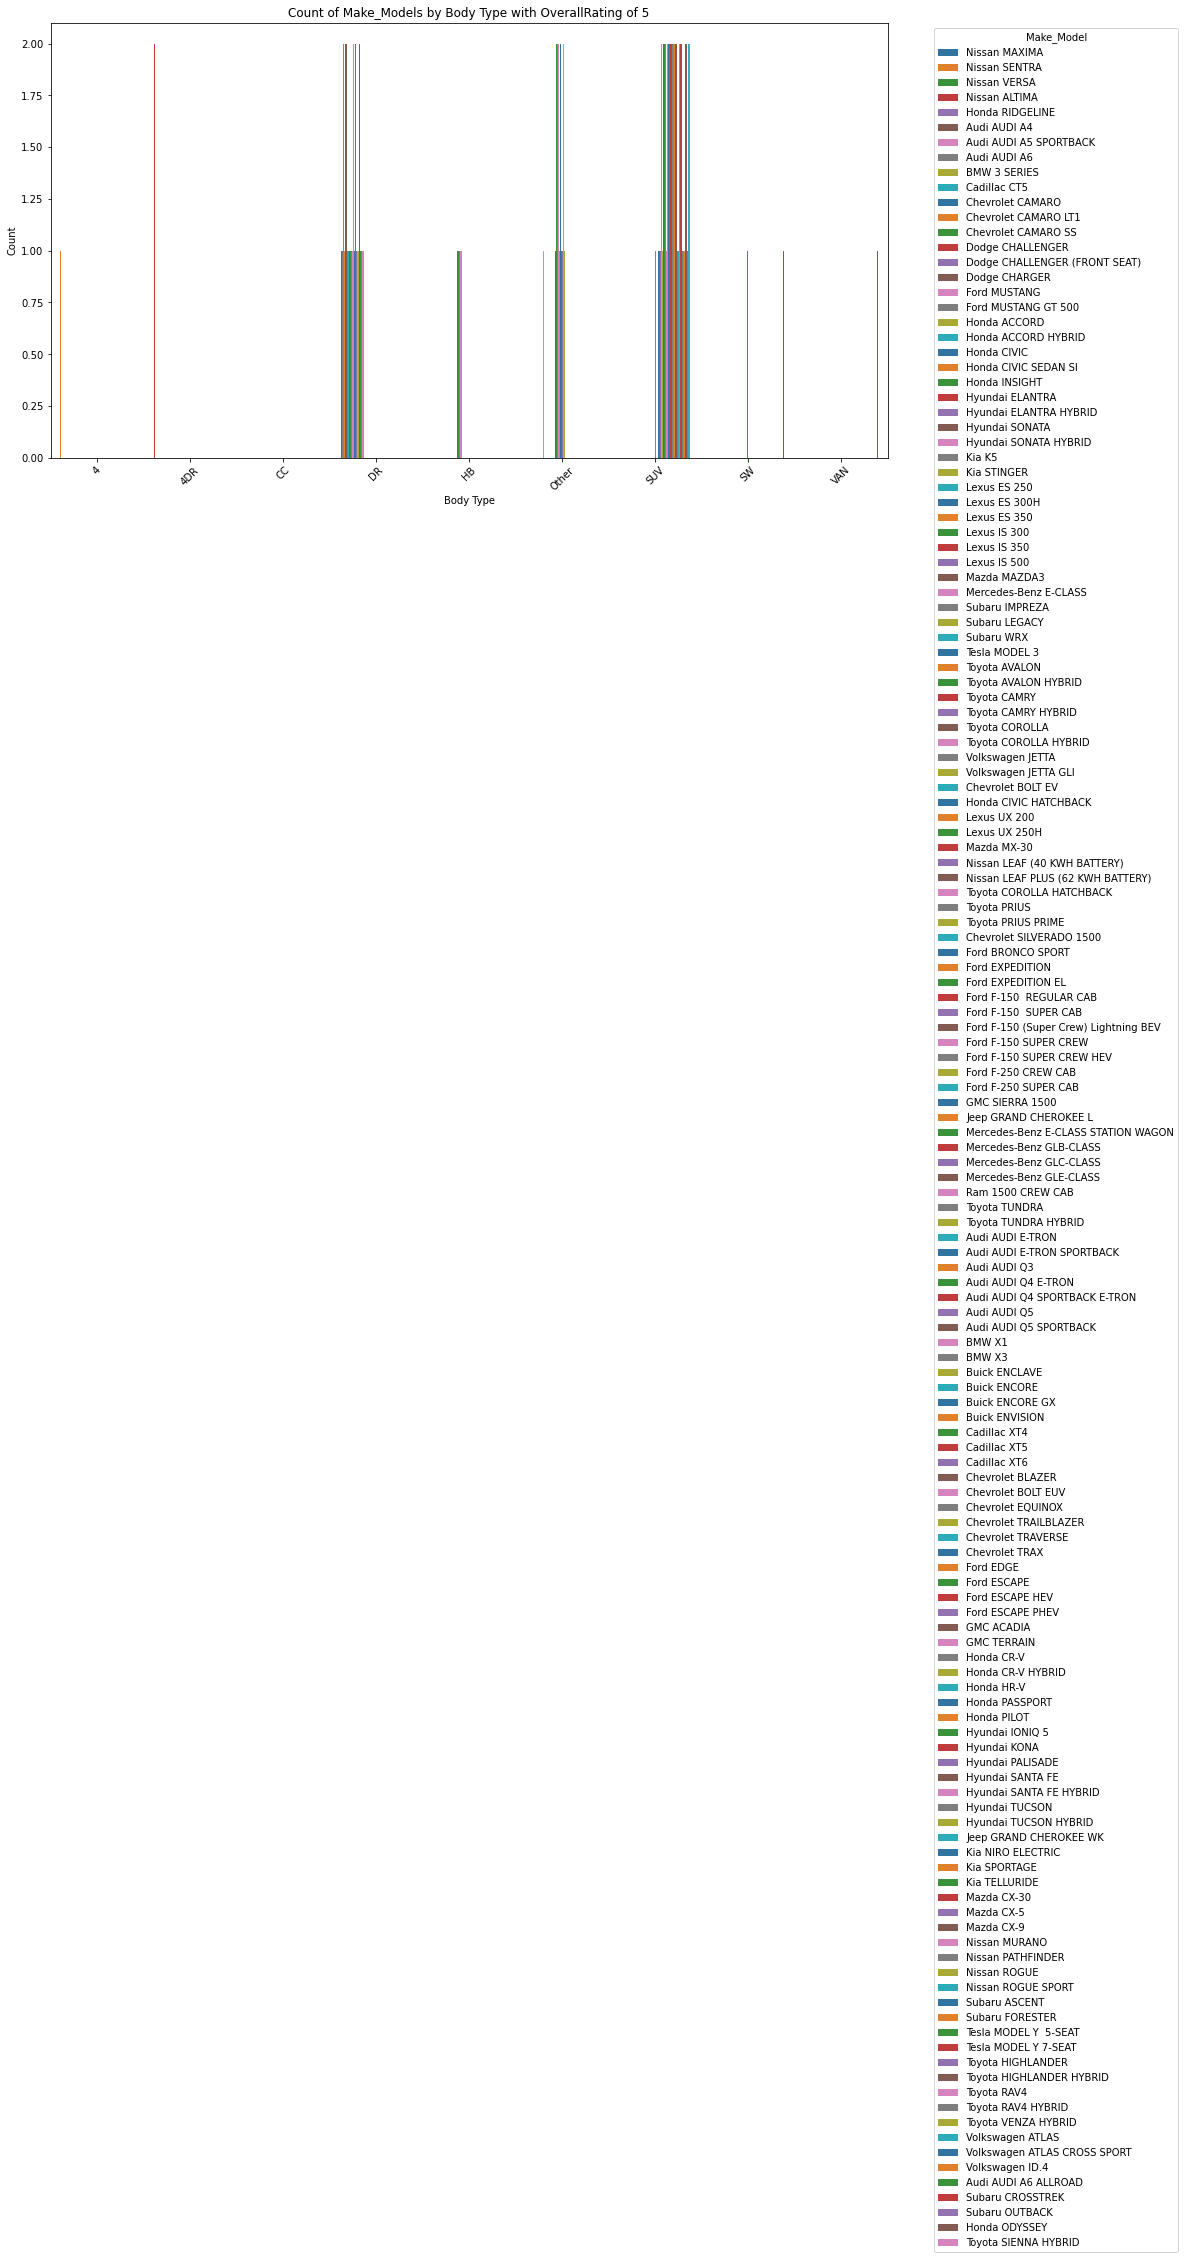

In [41]:
# Group by 'BodyType', 'Make_Model', and 'OverallRating' and get the count
count_df = df.groupby(['BodyType', 'Make_Model', 'OverallRating']).size().reset_index(name='Count')

# Filter the DataFrame for a specific rating (e.g., 5)
rating_5_df = count_df[count_df['OverallRating'] == 5]

# Display the count of makes and models for each body type with a rating of 5
print(rating_5_df[['BodyType', 'Make_Model', 'Count']])

# Visualization
plt.figure(figsize=(15, 8))
sns.barplot(x='BodyType', y='Count', hue='Make_Model', data=rating_5_df, palette="tab10")
plt.title('Count of Make_Models by Body Type with OverallRating of 5')
plt.xlabel('Body Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Make_Model', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


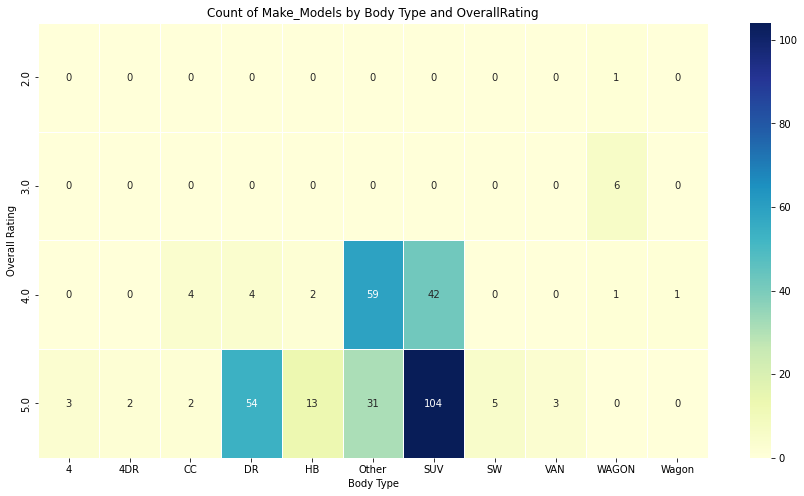

In [42]:
# Group by 'BodyType' and 'OverallRating' and get the count
count_df = df.groupby(['BodyType', 'OverallRating']).size().reset_index(name='Count')

# Pivot the DataFrame to get a matrix format
heatmap_data = count_df.pivot('OverallRating', 'BodyType', 'Count')
heatmap_data = heatmap_data.fillna(0)  # Fill NaN values with 0

# Visualization
plt.figure(figsize=(15, 8))
sns.heatmap(heatmap_data, cmap="YlGnBu", annot=True, fmt=".0f", linewidths=.5)
plt.title('Count of Make_Models by Body Type and OverallRating')
plt.xlabel('Body Type')
plt.ylabel('Overall Rating')
plt.show()


In [43]:
import requests
import pandas as pd

# Define the features to check
features_to_check = [
    "OverallFrontCrashRating", "FrontCrashDriversideRating", "FrontCrashPassengersideRating",
    "OverallSideCrashRating", "SideCrashDriversideRating", "SideCrashPassengersideRating",
    "combinedSideBarrierAndPoleRating-Front", "combinedSideBarrierAndPoleRating-Rear",
    "sideBarrierRating-Overall", "RolloverRating", "RolloverRating2", "RolloverPossibility",
    "RolloverPossibility2", "SidePoleCrashRating", "NHTSAElectronicStabilityControl",
    "NHTSAForwardCollisionWarning", "NHTSALaneDepartureWarning"
]

# Base URL for the API
feat_url = "https://api.nhtsa.gov/SafetyRatings/VehicleId"

# List to store the extracted features
features_data = []

# Iterate over the VehicleIds in your DataFrame
for vehicle_id in df['VehicleId']:
    response = requests.get(f"{feat_url}/{vehicle_id}")
    data = response.json()
    results = data['Results'][0]
    
    # Extract the desired features
    extracted_features = {feature: results[feature] for feature in features_to_check}
    extracted_features['Make_Model'] = results['Make'] + " " + results['Model']
    features_data.append(extracted_features)




In [44]:
# Convert the list of dictionaries to a DataFrame
features_df = pd.DataFrame(features_data)

# Calculate the average for numeric features
numeric_features = ["RolloverPossibility", "RolloverPossibility2"]
average_values = features_df[numeric_features].mean()

# Calculate the mode for categorical features
categorical_features = list(set(features_to_check) - set(numeric_features))
mode_values = features_df[categorical_features].mode().iloc[0]

# Print the results
print("Average Values:")
print(average_values)
print("\nMode Values:")
print(mode_values)

Average Values:
RolloverPossibility     0.109396
RolloverPossibility2    0.000000
dtype: float64

Mode Values:
OverallFrontCrashRating                   Not Rated
NHTSALaneDepartureWarning                  Standard
SideCrashPassengersideRating                      5
OverallSideCrashRating                            5
combinedSideBarrierAndPoleRating-Front            5
FrontCrashDriversideRating                Not Rated
NHTSAForwardCollisionWarning               Standard
SideCrashDriversideRating                         5
RolloverRating2                           Not Rated
SidePoleCrashRating                               5
FrontCrashPassengersideRating             Not Rated
NHTSAElectronicStabilityControl            Standard
combinedSideBarrierAndPoleRating-Rear             5
RolloverRating                                    4
sideBarrierRating-Overall                         5
Name: 0, dtype: object


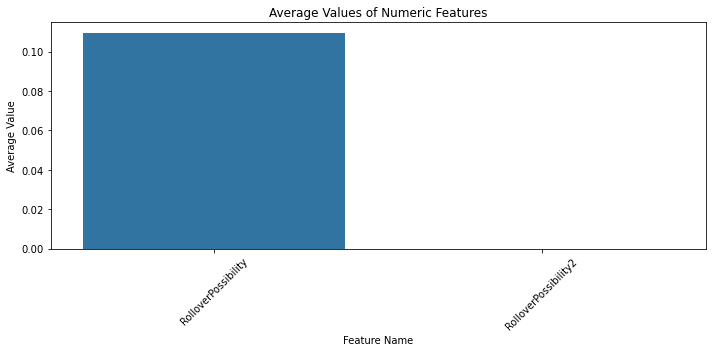

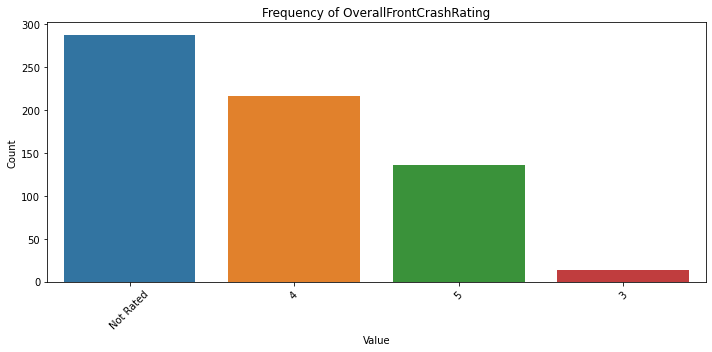

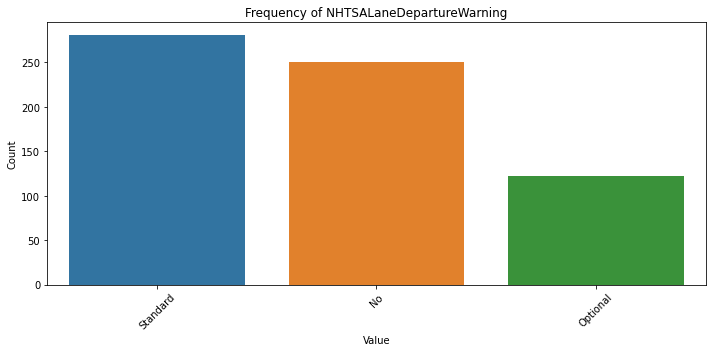

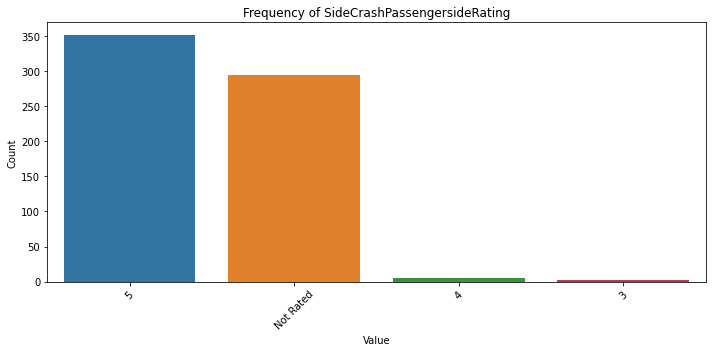

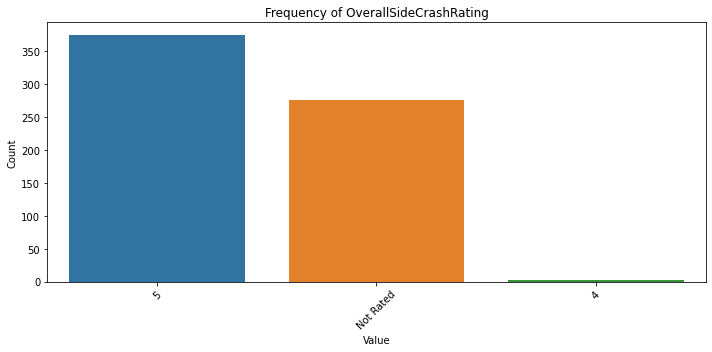

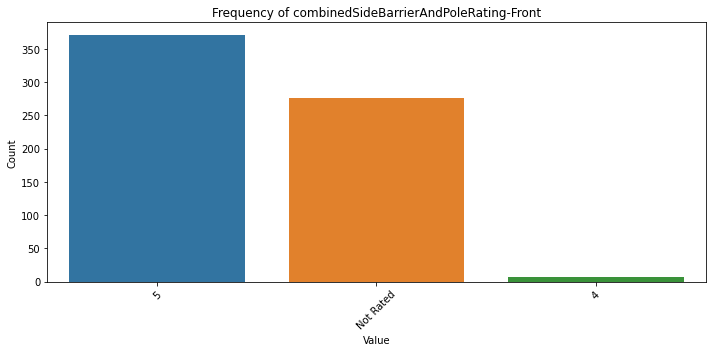

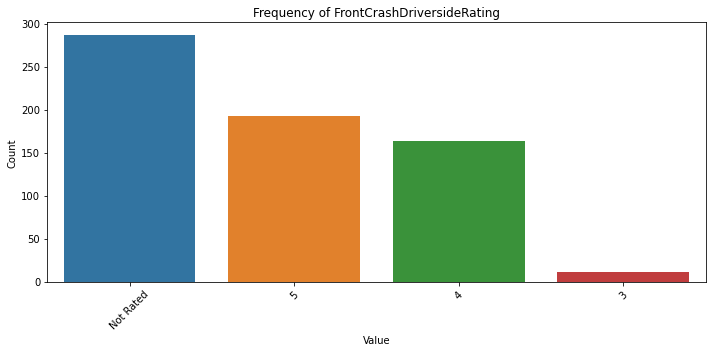

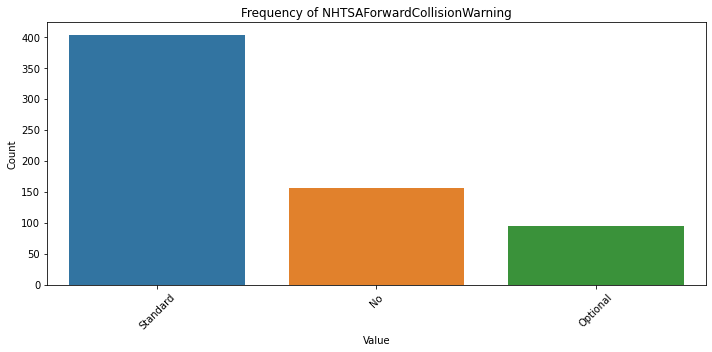

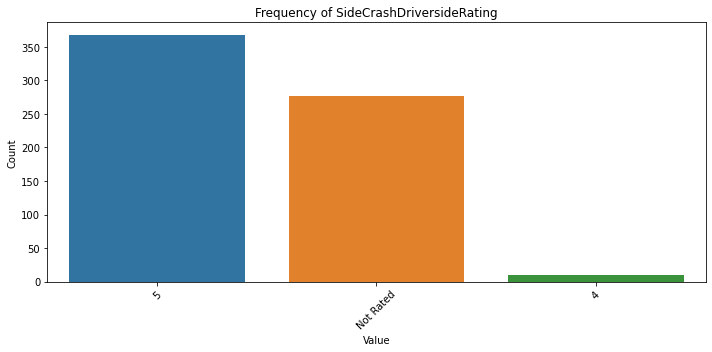

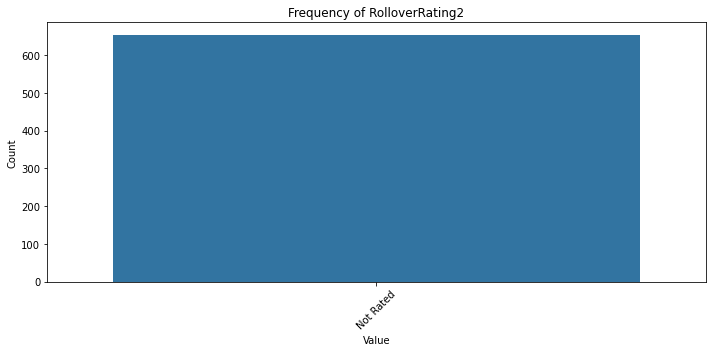

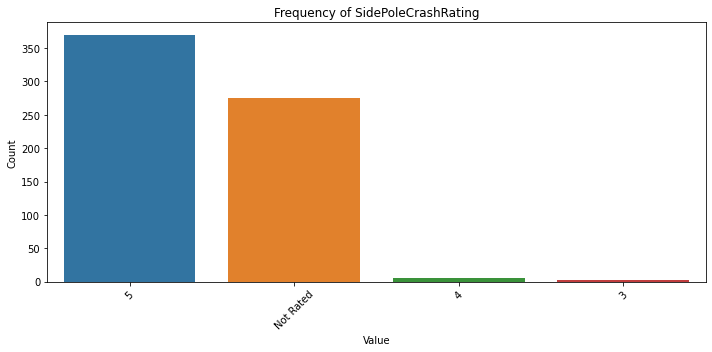

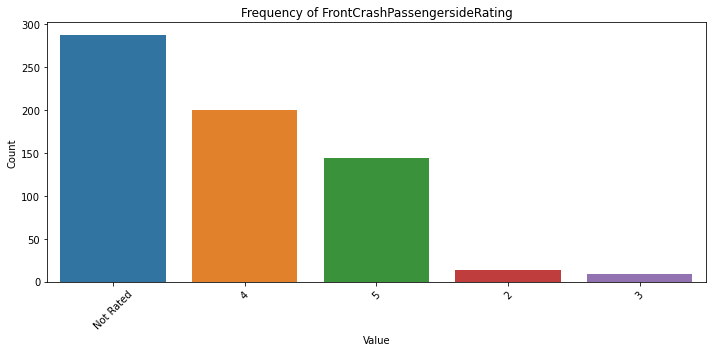

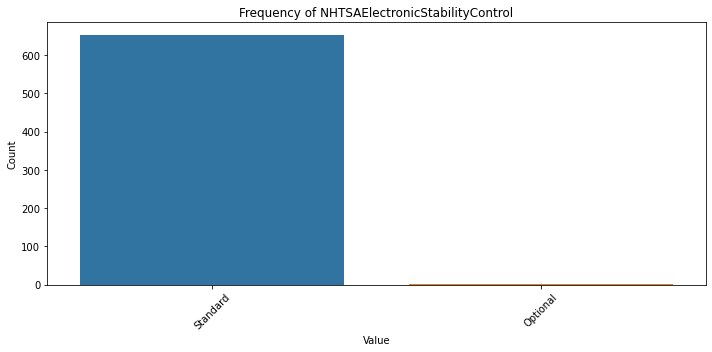

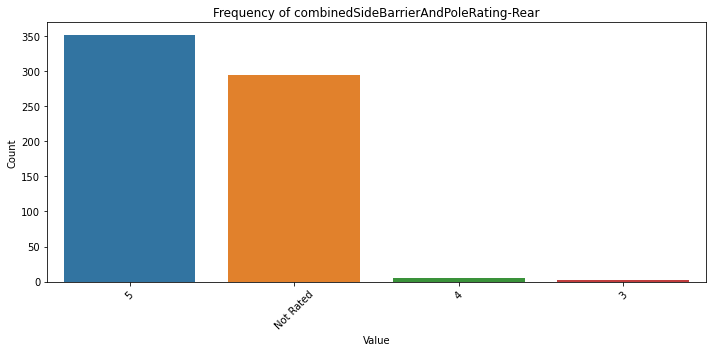

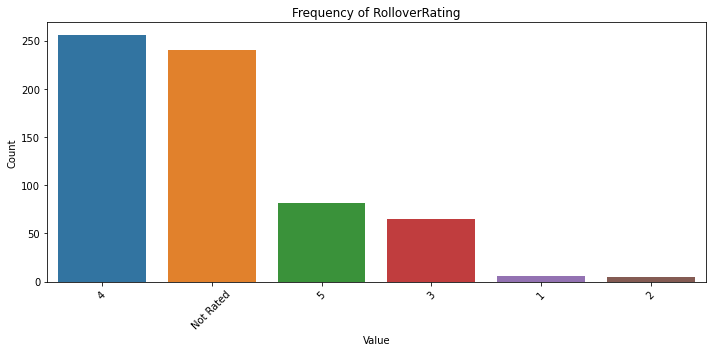

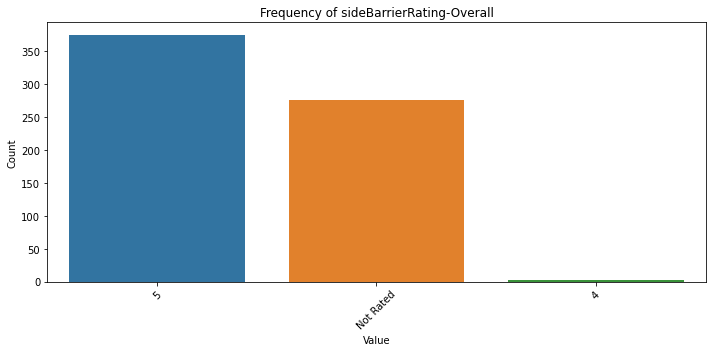

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting Numeric Features
plt.figure(figsize=(10, 5))
sns.barplot(x=average_values.index, y=average_values.values)
plt.title('Average Values of Numeric Features')
plt.ylabel('Average Value')
plt.xlabel('Feature Name')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plotting Categorical Features
for feature in categorical_features:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=features_df, x=feature, order=features_df[feature].value_counts().index)
    plt.title(f'Frequency of {feature}')
    plt.ylabel('Count')
    plt.xlabel('Value')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


In [53]:
# Define the features to check
features_to_check = [
    'OverallFrontCrashRating', 
    'FrontCrashDriversideRating', 
    'OverallSideCrashRating', 
    'RolloverRating',
]

# Extract the features for each Make_Model
all_features = []

for vehicle_id in df['VehicleId']:
    response = requests.get(f"https://api.nhtsa.gov/SafetyRatings/VehicleId/{vehicle_id}")
    data = response.json()
    features = {feature: data['Results'][0].get(feature, None) for feature in features_to_check}
    features['Make_Model'] = data['Results'][0]['Make'] + " " + data['Results'][0]['Model']
    features['BodyType'] = df[df['VehicleId'] == vehicle_id]['BodyType'].iloc[0]
    all_features.append(features)

# Convert to a dataframe
features_df = pd.DataFrame(all_features)

# Now, you can group by BodyType and calculate the count for each feature
counts_by_bodytype = features_df.groupby('BodyType').count()
print(counts_by_bodytype)


          OverallFrontCrashRating  FrontCrashDriversideRating  \
BodyType                                                        
4                               3                           3   
4DR                             2                           2   
C                              23                          23   
CC                              8                           8   
DR                            161                         161   
EC                              2                           2   
HB                             19                          19   
MV                              1                           1   
Other                         170                         170   
SUV                           206                         206   
SW                              8                           8   
VAN                            38                          38   
WAGON                          12                          12   
Wagon                    

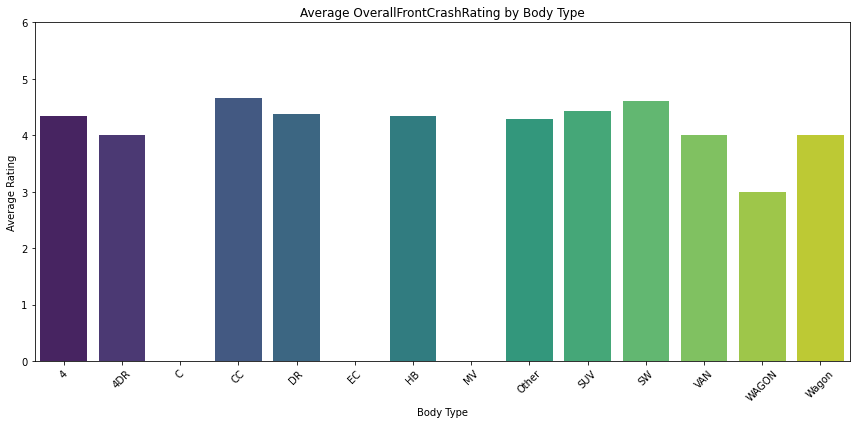

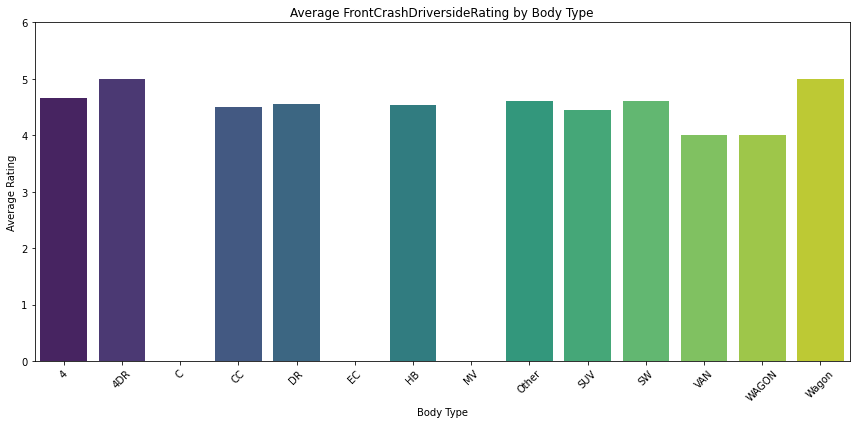

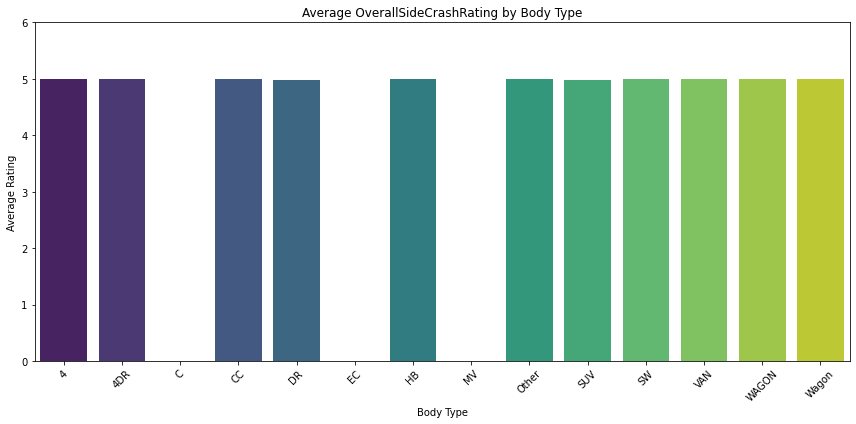

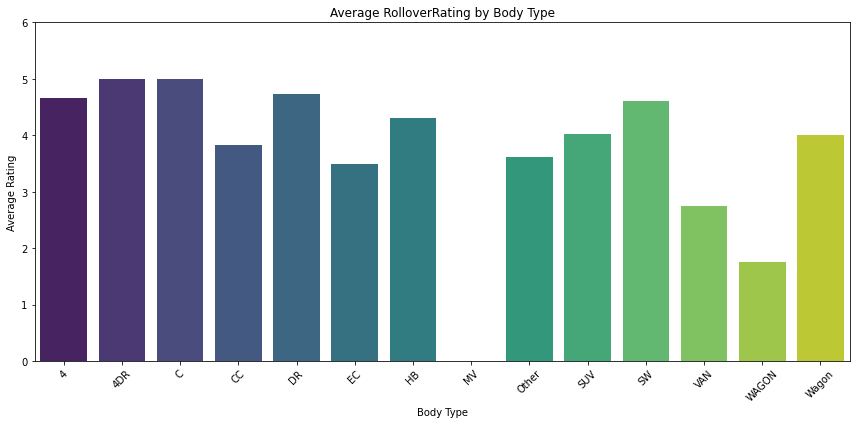

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert the ratings to numeric, replacing 'Not Rated' with NaN
for feature in features_to_check:
    features_df[feature] = pd.to_numeric(features_df[feature], errors='coerce')

# Calculate average rating by body type
avg_ratings_by_bodytype = features_df.groupby('BodyType')[features_to_check].mean()

# Plot the average ratings for each feature by body type
for feature in features_to_check:
    plt.figure(figsize=(12, 6))
    sns.barplot(x=avg_ratings_by_bodytype.index, y=avg_ratings_by_bodytype[feature], palette="viridis")
    plt.title(f'Average {feature} by Body Type')
    plt.ylabel('Average Rating')
    plt.xlabel('Body Type')
    plt.ylim(0, 6)  # Assuming ratings are on a scale of 1-5, adjust if needed
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
